In [1]:
## HDR is about correcting the intensity of certain regions of an image that is too bright or too dim
## (0) Capture multiple exposures

In [2]:
## (1) Importing dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [23]:
## (2) Read images


def readImagesAndTimes():
    # List of filenames
    filenames = glob.glob("BMW M4/*")
    filenames.sort()

    # List of exposure times
    times = np.array([0.05, 0.3, 2.5, 10.0], dtype=np.float32)

    # Read images
    images = []
    i = 0
    
    for filename in filenames:
        i += 1
        im = cv2.imread(filename)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        images.append(im)
        plt.figure(figsize = (30,10))
        plt.subplot(1, 4, i); plt.imshow(im); plt.show();
        
    return images, times

<Figure size 4000x1000 with 0 Axes>

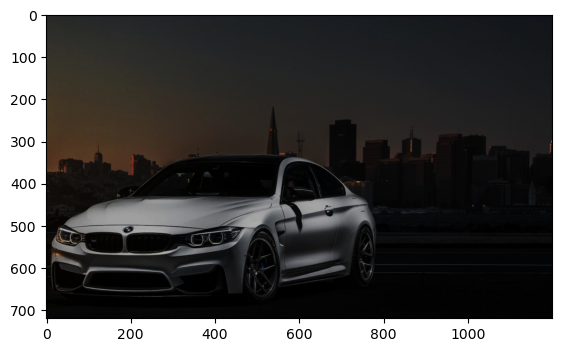

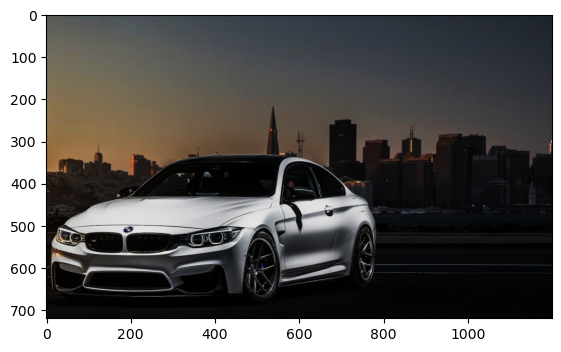

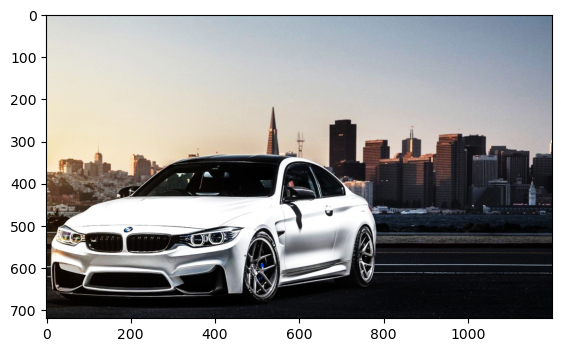

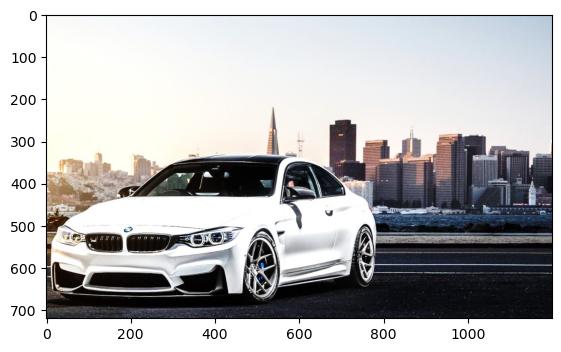

ValueError: num must be an integer with 1 <= num <= 4, not 5

In [24]:
## (3) Align images
# Read images and exposure times
images, times = readImagesAndTimes()

# Align images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

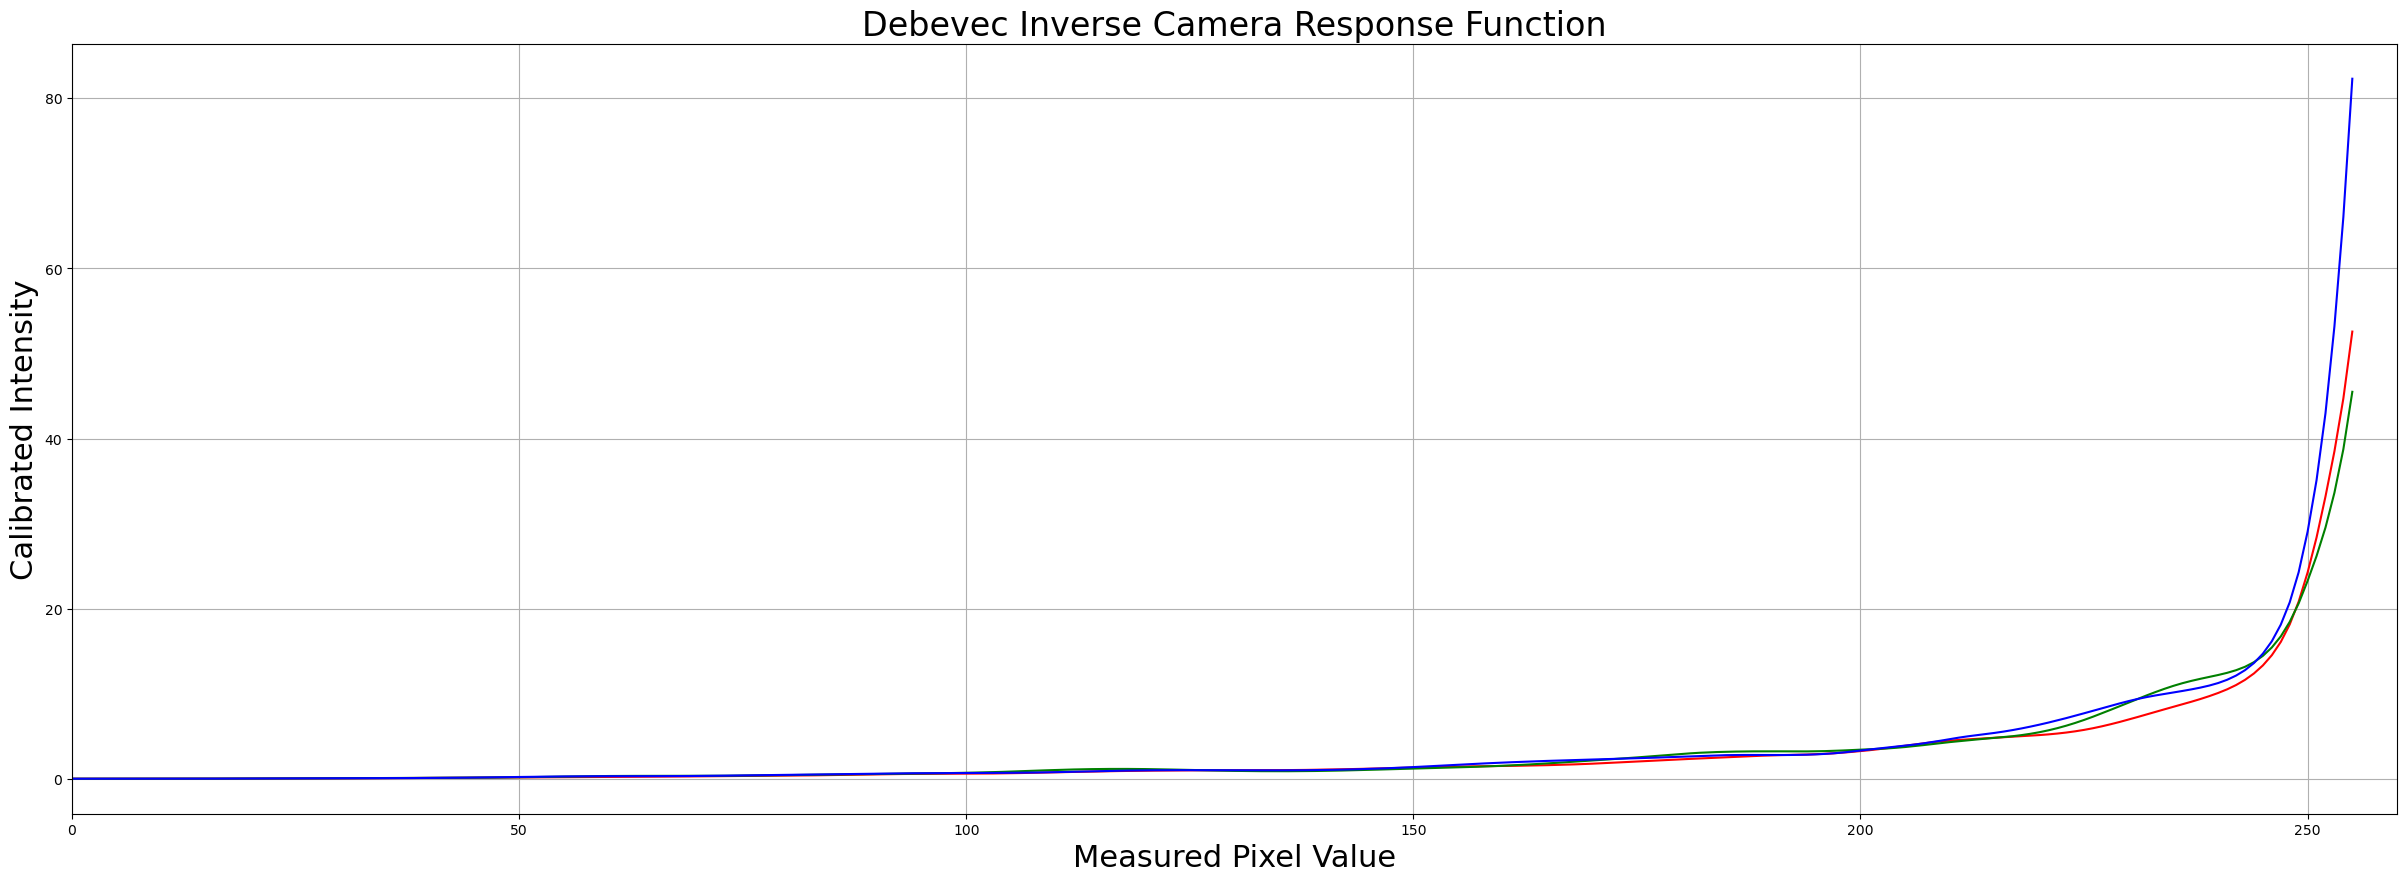

In [5]:
## (3) Estimate Camera Response Function (CRF)

# Find CRF
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30,10))
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:,0], 'r', x, y[:, 1], 'g', x, y[:, 2], 'b')
plt.show()

In [6]:
## (4) Merge exposure into an HDR image
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

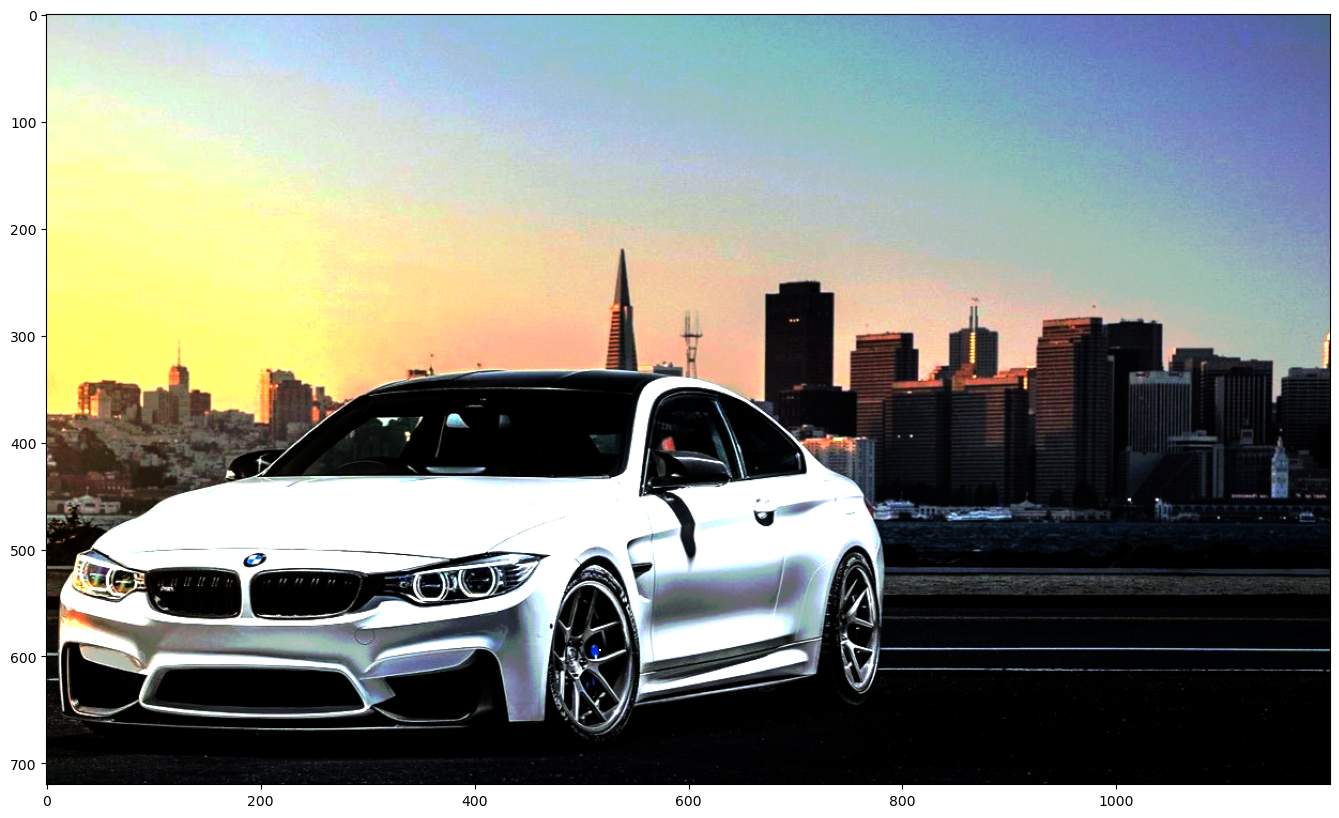

saved ldr-Drago.jpg


In [15]:
## (5) Tonemapping
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3*ldrDrago

plt.figure(figsize=(20, 10)); plt.imshow(np.clip(ldrDrago, 0, 1)); plt.show();
cv2.imwrite("ldr-Drago.jpg", ldrDrago*255)
print("saved ldr-Drago.jpg")

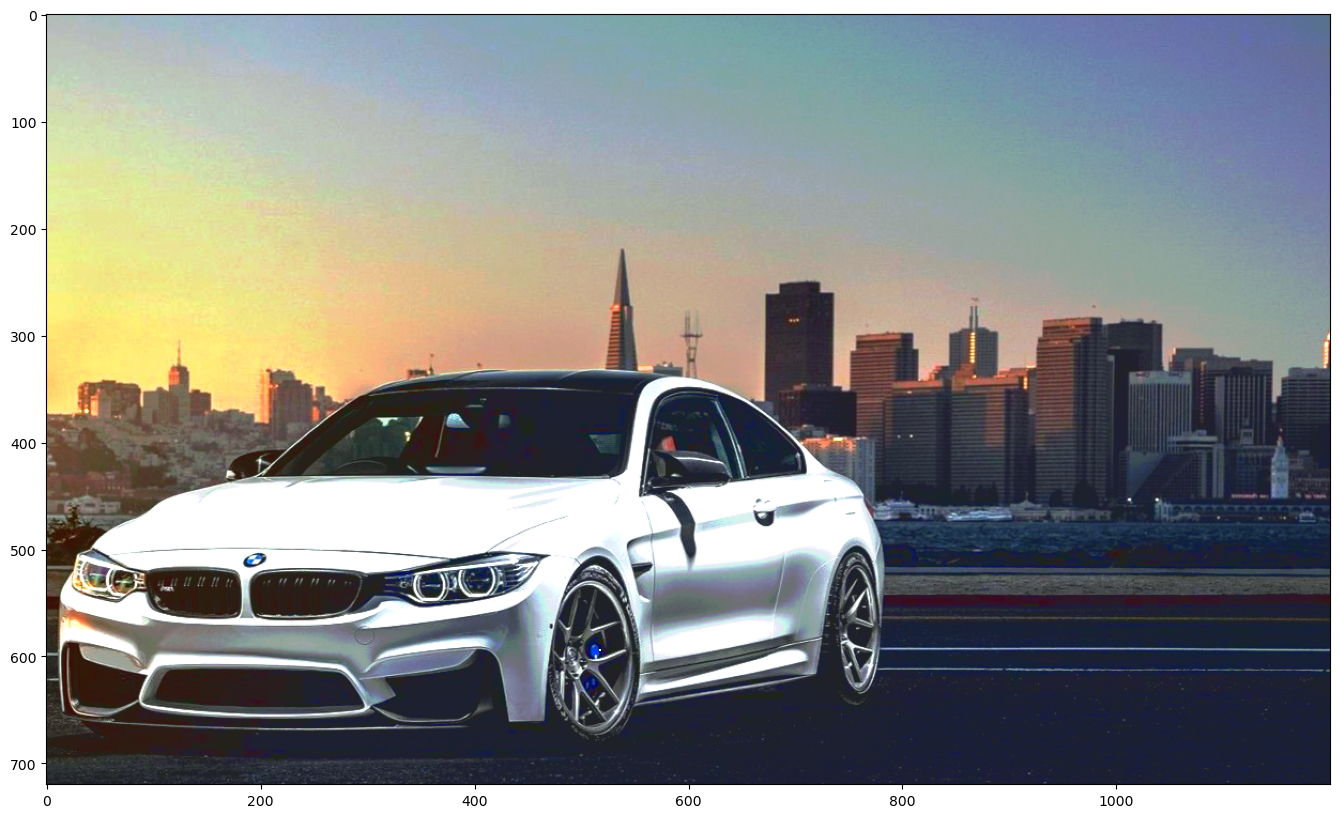

saved ldr-Mantiuk.jpg


In [26]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 2.8*ldrMantiuk

plt.figure(figsize=(20, 10)); plt.imshow(np.clip(ldrMantiuk, 0, 1)); plt.show();
cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk*255)
print("saved ldr-Mantiuk.jpg")